## Setup Environment

In [1]:
! git clone https://github.com/srivarshan-s/CNN-Transfer-Learning.git
% cd CNN-Transfer-Learning

Cloning into 'CNN-Transfer-Learning'...
remote: Enumerating objects: 25907, done.
remote: Counting objects: 100% (25907/25907), done.
remote: Compressing objects: 100% (25903/25903), done.
remote: Total 25907 (delta 3), reused 25903 (delta 2), pack-reused 0
Receiving objects: 100% (25907/25907), 547.16 MiB | 32.59 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (26197/26197), done.


## Importing Libraries

In [70]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model

## Loading Data

In [3]:
train_dir = "Tumor Dataset/Train/"
val_dir = "Tumor Dataset/Test/"

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=30, class_mode='categorical')

val_gen = val_datagen.flow_from_directory(
    val_dir, target_size=(150, 150), batch_size=30, class_mode='categorical')

Found 1050 images belonging to 3 classes.
Found 144 images belonging to 3 classes.


In [79]:
input_shape = (150, 150, 3)
batch_size = 30
epochs = 5

## Simple CNN Model

In [28]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='sigmoid'))


model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36992)            

In [29]:
history = model.fit(
    train_gen, 
    validation_data=val_gen,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

Epoch 1/5
35/35 [==============================] - 3s 65ms/step - loss: 2.4848 - accuracy: 0.6029 - val_loss: 1.3672 - val_accuracy: 0.4444
Epoch 2/5
35/35 [==============================] - 2s 59ms/step - loss: 0.3779 - accuracy: 0.8724 - val_loss: 1.7922 - val_accuracy: 0.5556
Epoch 3/5
35/35 [==============================] - 2s 58ms/step - loss: 0.0786 - accuracy: 0.9733 - val_loss: 2.7334 - val_accuracy: 0.5972
Epoch 4/5
35/35 [==============================] - 2s 59ms/step - loss: 0.0131 - accuracy: 0.9952 - val_loss: 3.5881 - val_accuracy: 0.5903
Epoch 5/5
35/35 [==============================] - 2s 58ms/step - loss: 1.8185e-04 - accuracy: 1.0000 - val_loss: 4.2167 - val_accuracy: 0.6111


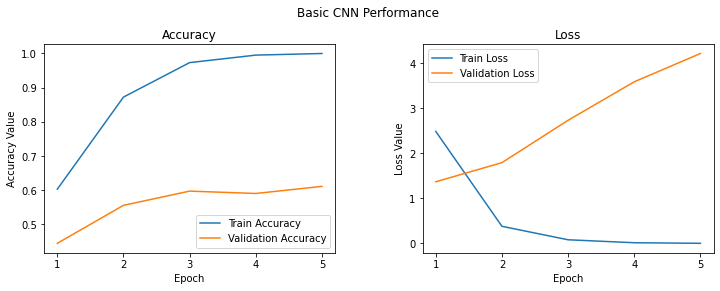

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,6))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, 6, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, 6, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## CNN Model with Regularization

In [47]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='sigmoid'))


model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [48]:
history = model.fit(
    train_gen, 
    validation_data=val_gen,
    batch_size=batch_size,
    epochs=8,
    verbose=1
)

Epoch 1/8
35/35 [==============================] - 3s 55ms/step - loss: 1.3569 - accuracy: 0.4533 - val_loss: 1.0617 - val_accuracy: 0.5625
Epoch 2/8
35/35 [==============================] - 2s 50ms/step - loss: 0.7997 - accuracy: 0.6305 - val_loss: 1.3453 - val_accuracy: 0.4722
Epoch 3/8
35/35 [==============================] - 2s 49ms/step - loss: 0.4476 - accuracy: 0.8276 - val_loss: 2.1082 - val_accuracy: 0.4236
Epoch 4/8
35/35 [==============================] - 2s 50ms/step - loss: 0.2889 - accuracy: 0.8895 - val_loss: 2.1335 - val_accuracy: 0.5486
Epoch 5/8
35/35 [==============================] - 2s 48ms/step - loss: 0.1435 - accuracy: 0.9600 - val_loss: 2.3532 - val_accuracy: 0.5625
Epoch 6/8
35/35 [==============================] - 2s 49ms/step - loss: 0.0748 - accuracy: 0.9771 - val_loss: 3.4283 - val_accuracy: 0.5833
Epoch 7/8
35/35 [==============================] - 2s 49ms/step - loss: 0.0716 - accuracy: 0.9810 - val_loss: 4.0310 - val_accuracy: 0.5417
Epoch 8/8
35/35 [===

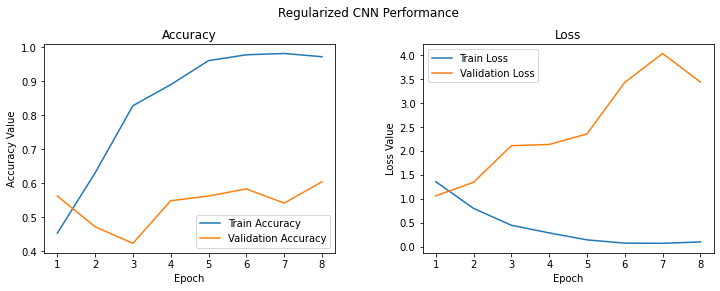

In [49]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Regularized CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,9))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, 9, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, 9, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## CNN Model with Image Augmentation

In [50]:
train_datagen = ImageDataGenerator(
    rescale=1./255, zoom_range=0.3, rotation_range=50,
    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
    horizontal_flip=True, fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [51]:
train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=30, class_mode='categorical')

val_gen = val_datagen.flow_from_directory(
    val_dir, target_size=(150, 150), batch_size=30, class_mode='categorical')

Found 1050 images belonging to 3 classes.
Found 144 images belonging to 3 classes.


In [54]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [55]:
history = model.fit(
    train_gen, 
    validation_data=val_gen,
    batch_size=batch_size,
    epochs=100,
    verbose=1
)

Epoch 1/100
35/35 [==============================] - 8s 206ms/step - loss: 1.1066 - accuracy: 0.3295 - val_loss: 1.0753 - val_accuracy: 0.4514
Epoch 2/100
35/35 [==============================] - 7s 203ms/step - loss: 1.1008 - accuracy: 0.3295 - val_loss: 1.0689 - val_accuracy: 0.5556
Epoch 3/100
35/35 [==============================] - 7s 199ms/step - loss: 1.0906 - accuracy: 0.3629 - val_loss: 1.0429 - val_accuracy: 0.3958
Epoch 4/100
35/35 [==============================] - 7s 199ms/step - loss: 1.0843 - accuracy: 0.3962 - val_loss: 1.0101 - val_accuracy: 0.3819
Epoch 5/100
35/35 [==============================] - 7s 199ms/step - loss: 1.0744 - accuracy: 0.4029 - val_loss: 1.0083 - val_accuracy: 0.6389
Epoch 6/100
35/35 [==============================] - 7s 200ms/step - loss: 1.0736 - accuracy: 0.3800 - val_loss: 0.9947 - val_accuracy: 0.3264
Epoch 7/100
35/35 [==============================] - 7s 199ms/step - loss: 1.0598 - accuracy: 0.4086 - val_loss: 1.0777 - val_accuracy: 0.3194

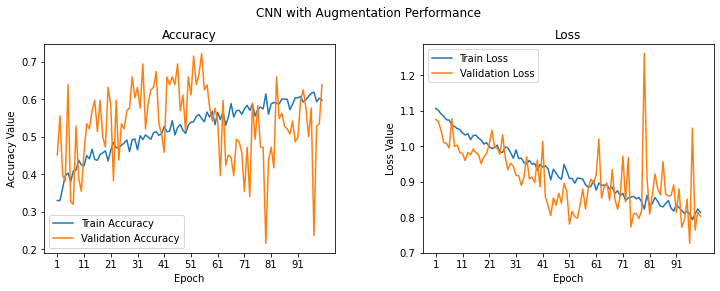

In [57]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN with Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [58]:
model.save('cnn_img_aug')

INFO:tensorflow:Assets written to: cnn_img_aug/assets


## VGG-16 Model

In [128]:
input_shape = (150, 150, 3)

In [129]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=30, class_mode='categorical')

val_gen = val_datagen.flow_from_directory(
    val_dir, target_size=(150, 150), batch_size=30, class_mode='categorical')

Found 1050 images belonging to 3 classes.
Found 144 images belonging to 3 classes.


In [130]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

In [131]:
output = vgg.layers[-1].output
output = Flatten()(output)
vgg_model = Model(vgg.input, output)

In [132]:
vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

In [133]:
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f98d04c6ed0>,input_14,False
1,<keras.layers.convolutional.Conv2D object at 0x7f98d04c6190>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f994cdd8750>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f98d7353f90>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f98d050add0>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f994cde8a50>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f98d4bfcc50>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f994cd2c750>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f98d050a590>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f99c5d85f90>,block3_conv3,False


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(1050, 4, 4, 512)


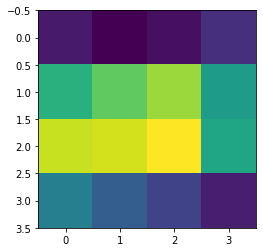

In [134]:
bottleneck_feature_example = vgg.predict_generator(train_gen)
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [135]:
def get_bottleneck_features(model, input_img):
    features = model.predict_generator(input_img)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_gen)
validation_features_vgg = get_bottleneck_features(vgg_model, val_gen)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Train Bottleneck Features: (1050, 8192) 	Validation Bottleneck Features: (144, 8192)


In [136]:
input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_33 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [137]:
history = model.fit(
    x=train_features_vgg, y=train_gen.labels, 
    validation_data=(validation_features_vgg, val_gen.labels),
    batch_size=30,
    epochs=10,
    verbose=1
)

Epoch 1/10
35/35 [==============================] - 1s 13ms/step - loss: 0.0488 - accuracy: 0.3305 - val_loss: -0.4341 - val_accuracy: 0.3958
Epoch 2/10
35/35 [==============================] - 0s 8ms/step - loss: 0.0080 - accuracy: 0.3333 - val_loss: -0.4098 - val_accuracy: 0.3958
Epoch 3/10
35/35 [==============================] - 0s 8ms/step - loss: 0.0846 - accuracy: 0.3333 - val_loss: -0.3844 - val_accuracy: 0.3958
Epoch 4/10
35/35 [==============================] - 0s 8ms/step - loss: -0.0723 - accuracy: 0.3333 - val_loss: -0.5206 - val_accuracy: 0.3958
Epoch 5/10
35/35 [==============================] - 0s 8ms/step - loss: -0.1169 - accuracy: 0.3333 - val_loss: -0.5898 - val_accuracy: 0.3958
Epoch 6/10
35/35 [==============================] - 0s 8ms/step - loss: -0.0680 - accuracy: 0.3333 - val_loss: -0.6099 - val_accuracy: 0.3958
Epoch 7/10
35/35 [==============================] - 0s 8ms/step - loss: -0.1759 - accuracy: 0.3333 - val_loss: -0.6067 - val_accuracy: 0.3958
Epoch 8/

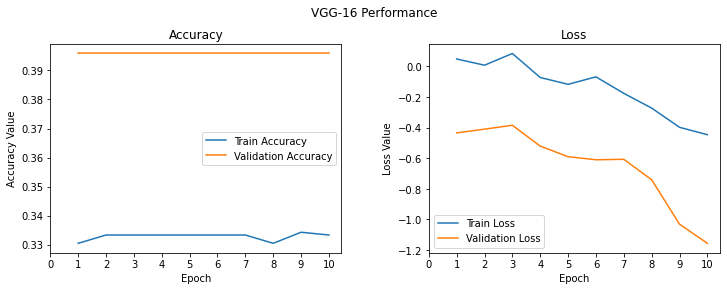

In [138]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG-16 Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 11, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 11, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## VGG-16 Model with Data Augmentation

In [127]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=30, class_mode='categorical')

val_gen = val_datagen.flow_from_directory(
    val_dir, target_size=(150, 150), batch_size=30, class_mode='categorical')

Found 1050 images belonging to 3 classes.
Found 144 images belonging to 3 classes.


In [143]:
model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

In [144]:
history = model.fit(
    train_gen, 
    validation_data=val_gen,
    batch_size=batch_size,
    epochs=10,
    verbose=1
)

Epoch 1/10
35/35 [==============================] - 7s 166ms/step - loss: 0.6705 - accuracy: 0.6305 - val_loss: 0.6443 - val_accuracy: 0.6667
Epoch 2/10
35/35 [==============================] - 6s 158ms/step - loss: 0.6530 - accuracy: 0.6559 - val_loss: 0.6391 - val_accuracy: 0.6667
Epoch 3/10
35/35 [==============================] - 6s 158ms/step - loss: 0.6472 - accuracy: 0.6632 - val_loss: 0.6379 - val_accuracy: 0.6667
Epoch 4/10
35/35 [==============================] - 6s 157ms/step - loss: 0.6432 - accuracy: 0.6657 - val_loss: 0.6375 - val_accuracy: 0.6667
Epoch 5/10
35/35 [==============================] - 6s 157ms/step - loss: 0.6414 - accuracy: 0.6663 - val_loss: 0.6370 - val_accuracy: 0.6667
Epoch 6/10
35/35 [==============================] - 6s 158ms/step - loss: 0.6402 - accuracy: 0.6663 - val_loss: 0.6375 - val_accuracy: 0.6667
Epoch 7/10
35/35 [==============================] - 6s 158ms/step - loss: 0.6395 - accuracy: 0.6667 - val_loss: 0.6375 - val_accuracy: 0.6667
Epoch 

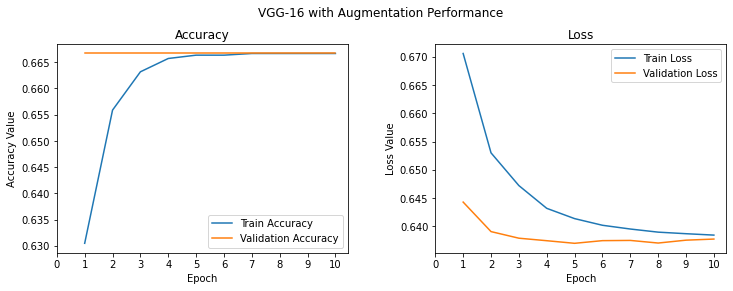

In [146]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG-16 with Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 11, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 11, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [147]:
model.save('tlearn_img_aug_cnn.')

INFO:tensorflow:Assets written to: tlearn_img_aug_cnn./assets


## VGG-16 with Fine-tuning & Augmentation

In [148]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [149]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f98d04c6ed0>,input_14,False
1,<keras.layers.convolutional.Conv2D object at 0x7f98d04c6190>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f994cdd8750>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f98d7353f90>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f98d050add0>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f994cde8a50>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f98d4bfcc50>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f994cd2c750>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f98d050a590>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f99c5d85f90>,block3_conv3,False


In [152]:
model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

In [153]:
history = model.fit(
    train_gen, 
    validation_data=val_gen,
    batch_size=batch_size,
    epochs=10,
    verbose=1
)

Epoch 1/10
35/35 [==============================] - 10s 245ms/step - loss: 0.6436 - accuracy: 0.6581 - val_loss: 0.6367 - val_accuracy: 0.6667
Epoch 2/10
35/35 [==============================] - 8s 235ms/step - loss: 0.6388 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 3/10
35/35 [==============================] - 8s 234ms/step - loss: 0.6382 - accuracy: 0.6667 - val_loss: 0.6365 - val_accuracy: 0.6667
Epoch 4/10
35/35 [==============================] - 8s 235ms/step - loss: 0.6379 - accuracy: 0.6667 - val_loss: 0.6368 - val_accuracy: 0.6667
Epoch 5/10
35/35 [==============================] - 8s 236ms/step - loss: 0.6379 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 6/10
35/35 [==============================] - 8s 235ms/step - loss: 0.6379 - accuracy: 0.6667 - val_loss: 0.6369 - val_accuracy: 0.6667
Epoch 7/10
35/35 [==============================] - 8s 236ms/step - loss: 0.6376 - accuracy: 0.6667 - val_loss: 0.6367 - val_accuracy: 0.6667
Epoch

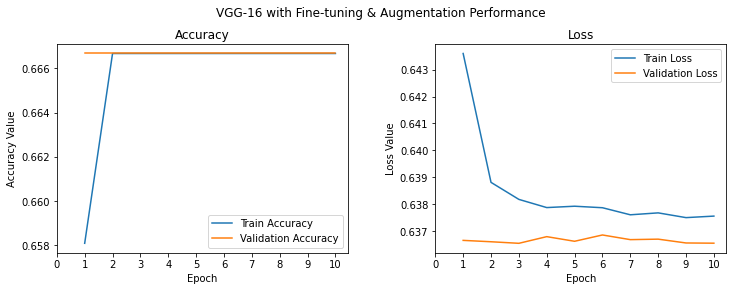

In [154]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG-16 with Fine-tuning & Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 11, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 11, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")